# Assignment 5 - 24/12/2024

**Objective:** Introduce students to spatial analysis using Python, focusing on spatial statistics, understanding spatial dependence, creating spatial weight matrices, and running a basic spatial regression.

**Dataset:** For this assignment, students are expected to find, download and merge required data, which are expected to be about US counties' socio-economic data, including spatial data (latitude, longitude, shapefiles) and socio-economic indicators.es.


**Tasks:**

1.	Load and Visualize the Dataset: 
- Use geopandas to import the dataset. 
- Find a shapefile, merge, 
- Plot a map showing the spatial distribution of counties.


In [150]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
#First, I import the libraries I will use.

<Axes: >

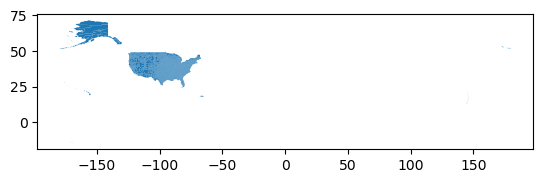

In [152]:
shapefile_path = "C:/Users/belki/OneDrive - marmara.edu.tr/Masaüstü/Advanced Data Analysis/Datasets/US/tl_2023_us_county.shp"
gdf = gpd.read_file(shapefile_path)
gdf.head()
gdf.plot()
#Then I get the data I downloaded from https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.html

In [170]:
excel_path = "C:/Users/belki/OneDrive - marmara.edu.tr/Masaüstü/Advanced Data Analysis/Datasets/US/ACSST1Y2023.S1902-Data.xlsx"
#Then I upload my data which is household income from American Community Survey.
excel_data = pd.read_excel(excel_path)
excel_data.head()

,GEOID,NAME,S1902_C01_001E,S1902_C01_001M,S1902_C01_002E,S1902_C01_002M,S1902_C01_003E,S1902_C01_003M,S1902_C01_004E,S1902_C01_004M,...,S1902_C03_024E,S1902_C03_024M,S1902_C03_025E,S1902_C03_025M,S1902_C03_026E,S1902_C03_026M,S1902_C03_027E,S1902_C03_027M,S1902_C03_028E,S1902_C03_028M
0,Geography,Geographic Area Name,Estimate!!Number!!HOUSEHOLD INCOME!!All househ...,Margin of Error!!Number!!HOUSEHOLD INCOME!!All...,Estimate!!Number!!HOUSEHOLD INCOME!!All househ...,Margin of Error!!Number!!HOUSEHOLD INCOME!!All...,Estimate!!Number!!HOUSEHOLD INCOME!!All househ...,Margin of Error!!Number!!HOUSEHOLD INCOME!!All...,Estimate!!Number!!HOUSEHOLD INCOME!!All househ...,Margin of Error!!Number!!HOUSEHOLD INCOME!!All...,...,Estimate!!Mean income (dollars)!!PER CAPITA IN...,Margin of Error!!Mean income (dollars)!!PER CA...,Estimate!!Mean income (dollars)!!PER CAPITA IN...,Margin of Error!!Mean income (dollars)!!PER CA...,Estimate!!Mean income (dollars)!!PER CAPITA IN...,Margin of Error!!Mean income (dollars)!!PER CA...,Estimate!!Mean income (dollars)!!PER CAPITA IN...,Margin of Error!!Mean income (dollars)!!PER CA...,Estimate!!Mean income (dollars)!!PER CAPITA IN...,Margin of Error!!Mean income (dollars)!!PER CA...
1,0500000US01003,"Baldwin County, Alabama",105698,2634,76651,3248,72793,3268,10485,2377,...,,,38093,20866,27945,6082,34935,8915,44658,3077
2,0500000US01015,"Calhoun County, Alabama",46310,1809,32584,2058,31206,2129,3950,1004,...,,,35289,26312,18681,5215,19444,6985,33921,3318
3,0500000US01043,"Cullman County, Alabama",35961,1201,26542,1480,24601,1566,5427,1320,...,,,,,18935,9461,24614,10684,33121,2677
4,0500000US01049,"DeKalb County, Alabama",27182,1249,18332,1299,16520,1264,4021,1117,...,,,10798,3315,21487,5690,10424,2716,26233,2253


In [172]:
excel_data['GEOID'] = excel_data['GEOID'].str[-5:]
#Since there is a prefix in my geoid that does not allow me to merge I only take the last 5 numbers as geo ids.

In [174]:
merged_gdf = gdf.merge(excel_data, on='GEOID')
#In the next step I merge data by geoid.

C:\Users\belki\AppData\Local\Temp\ipykernel_20120\30263406.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_gdf['S1902_C01_003E'] = merged_gdf['S1902_C01_003E'].fillna(0)


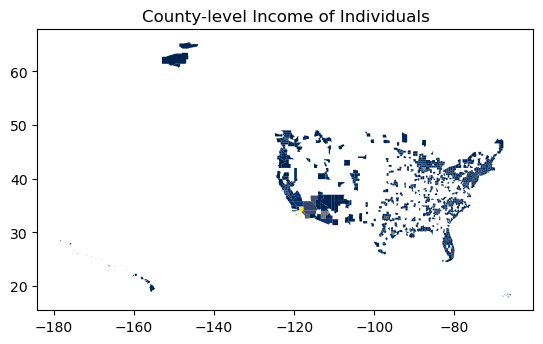

In [176]:
merged_gdf['S1902_C01_003E'] = merged_gdf['S1902_C01_003E'].fillna(0)
# I chose to visualize 'S1902_C01_003E' variable which is household income.
merged_gdf.plot(column='S1902_C01_003E', legend=False, cmap='cividis') # I turned off legend option and defined a color scale.
plt.title('County-level Income of Individuals') #I put a title on map
plt.show()

2. Spatial Weight Matrix:
  
- Create a spatial weights matrix for the counties

In [164]:
pip install libpysal

In [178]:
w = {}
for index, geometry in gdf.iterrows():
    neighbors = gdf[gdf.geometry.touches(geometry.geometry)]
    w[index] = list(neighbors.index)
#First, I create an empty dictionary. I will add the neighbors of each polygon to this dictionary. 
#Then, I create a list by writing a for loop to go to the index of each polygon and determine the polygons it touches and make it a matrix.

dict(list(w.items())[:9])
# And I check the first 10 of the weights matrix

{0: [917, 1194, 1823, 2010, 2212, 3188],
 1: [171, 172, 1492, 2039, 2306],
 2: [1678, 1840, 1944, 2550, 2651],
 3: [339, 557, 764, 1379, 1453, 1910, 2431, 3206],
 4: [77, 84, 1168, 2385, 2488, 2906],
 5: [259, 529, 541, 1406, 1407, 1542, 2573],
 6: [108, 478, 499, 1234, 1900, 2076, 2599, 2637],
 7: [230, 426, 1969, 2508, 2510, 2654, 3155],
 8: [709, 1468, 2043, 2175, 2824]}

3. Spatial Autocorrelation:
   
- Search and learn what is Moran’s I. 
- Calculate Moran’s I for a socio-economic indicator (e.g., income levels).

In [179]:
import libpysal
from esda.moran import Moran
#I first import the necessary libraries for the test.

merged_gdf = merged_gdf.dropna(subset=['geometry'])
#Then I clean NaNs

w = libpysal.weights.Queen.from_dataframe(merged_gdf)
w.transform = 'r'  #Row standardization

no_income = merged_gdf['S1902_C01_003E'].astype(float)
#I chose the number of no income families as my variable.

moran = Moran(no_income, w)
#Then I conduct the Moran's I test with adjacency matrix(w) and the indicator (household income).

print(f"Moran's I: {moran.I}")
print(f"p-value: {moran.p_sim}")
print(f"Z Score: {moran.z_sim}")

C:\Users\belki\AppData\Local\Temp\ipykernel_20120\677027046.py:8: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = libpysal.weights.Queen.from_dataframe(merged_gdf)
C:\Users\belki\anaconda3\Lib\site-packages\libpysal\weights\contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 143 disconnected components.
 There are 74 islands with ids: 0, 26, 35, 41, 43, 62, 75, 88, 89, 91, 112, 117, 121, 128, 130, 134, 135, 151, 193, 194, 201, 232, 253, 259, 293, 298, 303, 308, 312, 314, 317, 330, 332, 360, 371, 391, 419, 422, 469, 481, 497, 504, 525, 548, 549, 554, 555, 579, 583, 599, 624, 629, 646, 648, 663, 671, 673, 675, 677, 691, 705, 716, 719, 721, 737, 768, 782, 789, 790, 794, 805, 806, 822, 837.
  W.__init__(self, neighbors, ids=ids, **kw)


('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 26, ' is an island (no neighbors)')
('WARNING: ', 35, ' is an island (no neighbors)')
('WARNING: ', 41, ' is an island (no neighbors)')
('WARNING: ', 43, ' is an island (no neighbors)')
('WARNING: ', 62, ' is an island (no neighbors)')
('WARNING: ', 75, ' is an island (no neighbors)')
('WARNING: ', 88, ' is an island (no neighbors)')
('WARNING: ', 89, ' is an island (no neighbors)')
('WARNING: ', 91, ' is an island (no neighbors)')
('WARNING: ', 112, ' is an island (no neighbors)')
('WARNING: ', 117, ' is an island (no neighbors)')
('WARNING: ', 121, ' is an island (no neighbors)')
('WARNING: ', 128, ' is an island (no neighbors)')
('WARNING: ', 130, ' is an island (no neighbors)')
('WARNING: ', 134, ' is an island (no neighbors)')
('WARNING: ', 135, ' is an island (no neighbors)')
('WARNING: ', 151, ' is an island (no neighbors)')
('WARNING: ', 193, ' is an island (no neighbors)')
('WARNING: ', 194, ' is an island (no neig

4. Spatial Regression:

- Run a spatial regression model with a socio-economic variable as the dependent variable. 
- Interpret the coefficients briefly in comments. 

In [199]:
import geopandas as gpd
from spreg import OLS, ML_Lag, ML_Error
from libpysal.weights import Queen
import numpy as np

merged_gdf['S1902_C01_003E'] = pd.to_numeric(merged_gdf['S1902_C01_003E'], errors='coerce')
merged_gdf['S1902_C03_026E'] = pd.to_numeric(merged_gdf['S1902_C03_026E'], errors='coerce')
merged_gdf['S1902_C03_028E'] = pd.to_numeric(merged_gdf['S1902_C03_028E'], errors='coerce')
merged_gdf['S1902_C03_027E'] = pd.to_numeric(merged_gdf['S1902_C03_027E'], errors='coerce')
#First I transform all types of variables I use to numeric, and if not they turn to NaN.
merged_gdf = merged_gdf.dropna(subset=['S1902_C01_003E', 'S1902_C03_026E', 'S1902_C03_028E', 'S1902_C03_027E'])
#Then I drop NaNs.

y = merged_gdf['S1902_C01_003E'].values.reshape(-1, 1)  #I define dependent variable which is household income.
X = merged_gdf[['S1902_C03_026E', 'S1902_C03_028E', 'S1902_C03_027E']].values  #and independent variables unemployment, education and poverty
X = np.hstack([np.ones((X.shape[0], 1)), X]) #and add constant
variable_names = ['Constant', 'Unemployment', 'Education', 'Poverty'] #they I rename variables to make them distinguishable

w = Queen.from_dataframe(merged_gdf) #here is the weightning matrix
w.transform = 'r'  #and row standardization

ols = OLS(y, X, w=w, spat_diag=True, name_x=variable_names) #OLS model
print(ols.summary) #and let's see what happened

C:\Users\belki\AppData\Local\Temp\ipykernel_20120\3053815787.py:19: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = Queen.from_dataframe(merged_gdf) #here is the weightning matrix


('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 26, ' is an island (no neighbors)')
('WARNING: ', 35, ' is an island (no neighbors)')
('WARNING: ', 41, ' is an island (no neighbors)')
('WARNING: ', 43, ' is an island (no neighbors)')
('WARNING: ', 62, ' is an island (no neighbors)')
('WARNING: ', 74, ' is an island (no neighbors)')
('WARNING: ', 87, ' is an island (no neighbors)')
('WARNING: ', 88, ' is an island (no neighbors)')
('WARNING: ', 90, ' is an island (no neighbors)')
('WARNING: ', 93, ' is an island (no neighbors)')
('WARNING: ', 111, ' is an island (no neighbors)')
('WARNING: ', 116, ' is an island (no neighbors)')
('WARNING: ', 119, ' is an island (no neighbors)')
('WARNING: ', 126, ' is an island (no neighbors)')
('WARNING: ', 130, ' is an island (no neighbors)')
('WARNING: ', 131, ' is an island (no neighbors)')
('WARNING: ', 147, ' is an island (no neighbors)')
('WARNING: ', 167, ' is an island (no neighbors)')
('WARNING: ', 170, ' is an island (no neigh

C:\Users\belki\anaconda3\Lib\site-packages\libpysal\weights\contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 143 disconnected components.
 There are 74 islands with ids: 0, 26, 35, 41, 43, 62, 74, 87, 88, 90, 93, 111, 116, 119, 126, 130, 131, 147, 167, 170, 189, 190, 197, 227, 247, 253, 287, 292, 297, 301, 305, 308, 320, 322, 350, 361, 380, 406, 409, 456, 466, 482, 489, 510, 533, 534, 539, 540, 562, 603, 608, 624, 626, 640, 648, 650, 652, 665, 679, 690, 693, 695, 711, 739, 753, 755, 760, 761, 765, 773, 776, 777, 792, 806.
  W.__init__(self, neighbors, ids=ids, **kw)


5. Visualization:
    
- Create a choropleth map showing the distribution of the selected socio-economic indicator. 

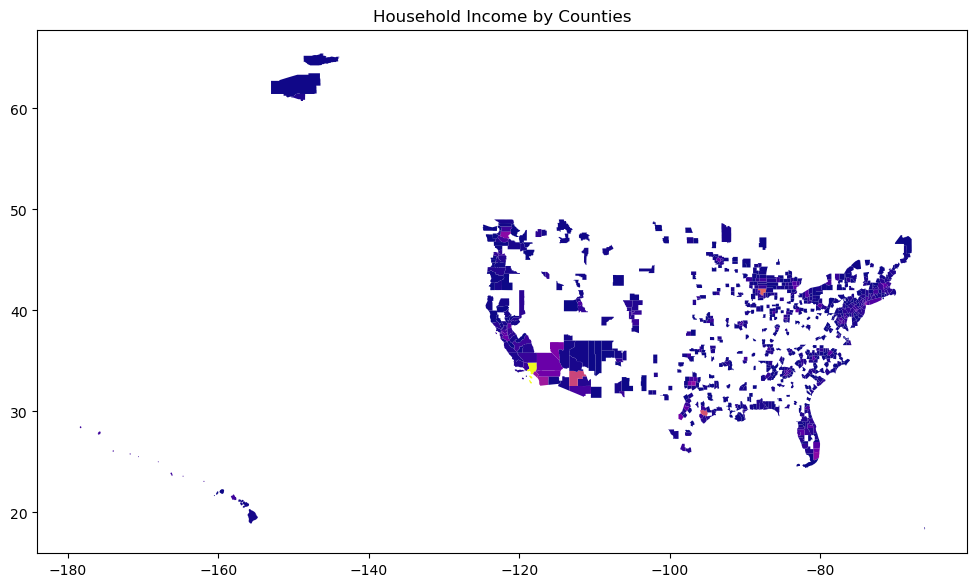

In [203]:
import geopandas as gpd
import matplotlib.pyplot as plt

# 1. Eksik verileri temizleme
merged_gdf = merged_gdf.dropna(subset=['S1902_C01_003E'])  
#First I clear NaNs.

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
merged_gdf.plot(column='S1902_C01_003E',  #dependent variable (household income)
                cmap='plasma', #color palette
                linewidth=0.8,
                ax=ax,
                legend=False)  #no legend


plt.title('Household Income by Counties', fontsize=12) #then I add title with a specific font size
plt.show()
